# Lens parameter distributions

* This notebook shows example how to use the `LensGalaxyParameterDistribution` class to create a distribution of lens galaxy parameters.

* You can change model or model parameters and compare the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7, Tcmb0=0.0, Neff=3.04, m_nu=None, Ob0=0.0)

from ler.lens_galaxy_population import LensGalaxyParameterDistribution
from ler.utils import append_json, get_param_from_json

Setting multiprocessing start method to 'fork'


## SIS

In [3]:
lens1 = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    cosmology=None,
    event_type="BBH",
    CBCSourceParameterDistribution_=False,
    lens_type="sis_galaxy",
    lens_functions = dict(
            cross_section_based_sampler="rejection_sampling_with_cross_section_sis",
            optical_depth="optical_depth_sis_numerical",
        ),
    lens_param_samplers=dict(
            velocity_dispersion="velocity_dispersion_ewoud",
            # axis_ratio=njit(lambda size: np.ones(size)),
        ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_2.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_0.pickle
axis_ratio sampler: CPUDispatcher(<function LensGalaxyParameterDistribution.lens_param_samplers_categorization.<locals>.<lambda> at 0x349515c60>) has been set.
optical_depth_sis_numerical interpolator will be loaded from ./interpolator_json/optical_depth_sis_numerical/optical_depth_sis_numerical_4.pickle

Initiali

In [5]:
lens1.cross_section_function?

Signature: lens1.cross_section_function(sigma, zl, zs)
Docstring:
Function to compute the SIS cross-section

Parameters
----------
sigma : `float`
    velocity dispersion of the lens galaxy
zl : `float`
    redshift of the lens galaxy
zs : `float`
    redshift of the source galaxy

Returns
-------
cross_section : `float`
    SIS cross-section

Examples
--------
>>> from ler.lens_galaxy_population import OpticalDepth
>>> od = OpticalDepth()
>>> print(od.cross_section_sis(sigma=200., zl=0.5, zs=1.0))
File:      ~/phd/mypackages/ler/ler/lens_galaxy_population/optical_depth.py
Type:      method

In [ ]:
# # sample all lens parameters and source parameters
# lens_params1 = lens1.sample_lens_parameters(25000)
# # getting the image properrties
# lens_params_all1 = lens1.image_properties(lens_params1)

sampling lens parameters with sample_all_routine_sis...
solving lens equations...


100%|████████████████████████████████████████████████████████| 25000/25000 [01:50<00:00, 225.47it/s]


In [3]:
#append_json("lens_params_all1.json", lens_params_all1, replace=True);
lens_params_all1 = get_param_from_json("lens_params_all1.json")

## SIE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7, Tcmb0=0.0, Neff=3.04, m_nu=None, Ob0=0.0)

from ler.lens_galaxy_population import LensGalaxyParameterDistribution, OpticalDepth
from ler.utils import append_json, get_param_from_json

Setting multiprocessing start method to 'fork'


In [2]:
lens_sie_feixu = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    event_type="BBH",
    lens_type="sie_galaxy",
    lens_functions = dict(
        cross_section_based_sampler="rejection_sampling_with_cross_section_sie_feixu",
        optical_depth="optical_depth_sie_feixu_numerical",
        optical_depth_params=None,
        param_sampler_type="sample_all_routine_sie",
    ),
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_choi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_2.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_0.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_2.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x107c36e60>) has been set.
optical_depth_sie

In [3]:
lens_sie_ca = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    event_type="BBH",
    lens_type="sie_galaxy",
    lens_functions = dict(
        cross_section_based_sampler="rejection_sampling_with_cross_section",
        optical_depth="optical_depth_sie_hemanta",
        optical_depth_params=dict(interpolated_cross_section=False),
        param_sampler_type="sample_all_routine_epl_shear",
    ),
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_choi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_2.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_0.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_2.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x358523b50>) has been set.
Using pre-gererat

In [4]:
lens_sie_ca_i = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    event_type="BBH",
    lens_type="sie_galaxy",
    lens_functions = dict(
        cross_section_based_sampler="rejection_sampling_with_cross_section",
        optical_depth="optical_depth_sie_hemanta",
        optical_depth_params=dict(interpolated_cross_section=True),
        param_sampler_type="sample_all_routine_epl_shear",
    ),
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_choi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_2.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_0.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_2.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x1080b9120>) has been set.
Interpolated cros

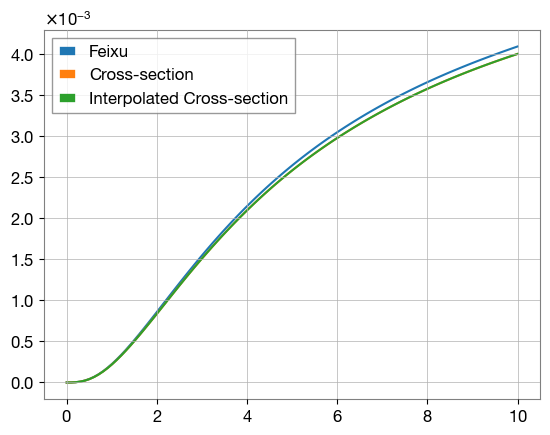

In [12]:
# check all parameters: 
zs = np.linspace(0.001, 10, 100)

plt.plot(zs, lens_sie_feixu.strong_lensing_optical_depth(zs), label="Feixu")
plt.plot(zs, lens_sie_ca.strong_lensing_optical_depth(zs), label="Cross-section")
plt.plot(zs, lens_sie_ca_i.strong_lensing_optical_depth(zs), label="Interpolated Cross-section")
plt.legend()
plt.show()



In [5]:
# sample all lens parameters and source parameters
lens_sie_feixu_params = lens_sie_feixu.sample_lens_parameters(10000)
# getting the image properrties
lens_sie_feixu_params_all = lens_sie_feixu.image_properties(lens_sie_feixu_params)

sampling lens parameters with sample_all_routine_sie...
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_section_sie_feixu
rejection_sampling_with_cross_se

100%|███████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6814.90it/s]


In [6]:
lens_sie_ca_params = lens_sie_ca.sample_lens_parameters(10000)
# getting the image properrties
lens_sie_ca_params_all = lens_sie_ca.image_properties(lens_sie_ca_params)
# 2m 38s

sampling lens parameters with sample_all_routine_epl_shear...
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cr

100%|███████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6827.35it/s]


In [7]:
lens_sie_ca_i_params = lens_sie_ca_i.sample_lens_parameters(10000)
# getting the image properrties
lens_sie_ca_i_params_all = lens_sie_ca_i.image_properties(lens_sie_ca_i_params)
# 1m 51s

sampling lens parameters with sample_all_routine_epl_shear...
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cross_section
rejection_sampling_with_cr

100%|███████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6806.64it/s]


In [12]:
lens_sie_ca_i_params_all.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'theta_E', 'cross_section', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source'])

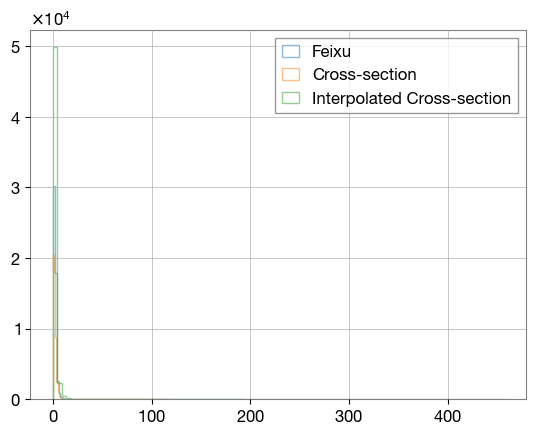

In [24]:
plt.hist(lens_sie_feixu_params_all['theta_E'], bins=100, alpha=0.5, label="Feixu", histtype='step')
plt.hist(lens_sie_ca_params_all['theta_E'], bins=100, alpha=0.5, label="Cross-section", histtype='step')
plt.hist(lens_sie_ca_i_params_all['theta_E'], bins=100, alpha=0.5, label="Interpolated Cross-section", histtype='step')
plt.legend()
plt.show()

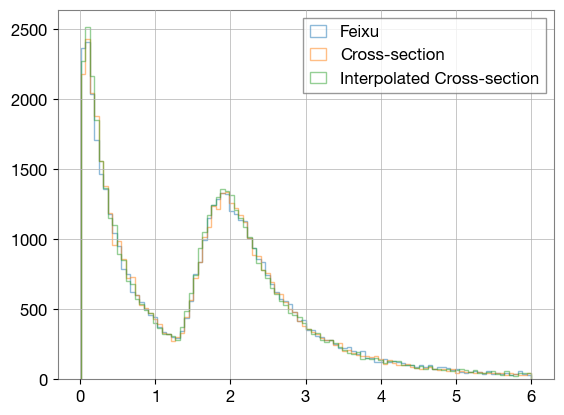

In [25]:
mu_max = 6
mu_sie_feixu = lens_sie_feixu_params_all["magnifications"].flatten()
mu_sie_feixu = abs(mu_sie_feixu[~np.isnan(mu_sie_feixu)])
mu_sie_feixu = mu_sie_feixu[mu_sie_feixu < mu_max]
mu_sie_ca = lens_sie_ca_params_all["magnifications"].flatten()
mu_sie_ca = abs(mu_sie_ca[~np.isnan(mu_sie_ca)])
mu_sie_ca = mu_sie_ca[mu_sie_ca < mu_max]
mu_sie_ca_i = lens_sie_ca_i_params_all["magnifications"].flatten()
mu_sie_ca_i = abs(mu_sie_ca_i[~np.isnan(mu_sie_ca_i)])
mu_sie_ca_i = mu_sie_ca_i[mu_sie_ca_i < mu_max]

plt.hist(mu_sie_feixu, bins=100, alpha=0.5, label="Feixu", histtype='step')
plt.hist(mu_sie_ca, bins=100, alpha=0.5, label="Cross-section", histtype='step')
plt.hist(mu_sie_ca_i, bins=100, alpha=0.5, label="Interpolated Cross-section", histtype='step')
plt.legend()

plt.show()


In [4]:
lens_params2 = lens2.sample_lens_parameters(25000)
lens_params_all2 = lens2.image_properties(lens_params2)

sampling lens parameters with sample_all_routine_sie...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6493.63it/s]


In [7]:
append_json("lens_params_all2.json", lens_params_all2, replace=True);

## EPL+Shear

In [8]:
lens3 = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    cosmology=None,
    event_type="BBH",
    CBCSourceParameterDistribution_=False,
    lens_type="epl_shear_galaxy",
    lens_functions = dict(
            cross_section_based_sampler="rejection_sampling_with_cross_section",
            optical_depth="optical_depth_epl_shear_hemanta",
        ),
    lens_param_samplers=dict(
            velocity_dispersion="velocity_dispersion_ewoud",
            # axis_ratio=njit(lambda size: np.ones(size)),
        ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing CBCSourceParameterDistribution...


Initializing CBCSourceRedshiftDistribution...

z_to_luminosity_distance interpolator will be loaded from ./interpolator_json/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_1.pickle
merger_rate_density interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_0.pickle

Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differentia

In [11]:
lens_params3 = lens3.sample_lens_parameters(25000)
lens_params_all3 = lens3.image_properties(lens_params3)
# size = 10000, time = 4.5 min

sampling lens parameters with sample_all_routine_epl_shear...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6793.44it/s]


In [16]:
append_json("lens_params_all3.json", lens_params_all3, replace=True);

In [33]:
lens4 = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    cosmology=None,
    event_type="BBH",
    CBCSourceParameterDistribution_=False,
    lens_type="epl_shear_galaxy",
    lens_functions = dict(
            cross_section_based_sampler="rejection_sampling_with_cross_section_sis",
            optical_depth="optical_depth_epl_shear_hemanta",
            param_sampler_type="sample_all_routine_sis",
        ),
    lens_param_samplers=dict(
            velocity_dispersion="velocity_dispersion_ewoud",
            # axis_ratio=njit(lambda size: np.ones(size)),
        ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing CBCSourceParameterDistribution...


Initializing CBCSourceRedshiftDistribution...

z_to_luminosity_distance interpolator will be loaded from ./interpolator_json/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_1.pickle
merger_rate_density interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_0.pickle

Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differentia

In [34]:
lens_params4 = lens4.sample_lens_parameters(25000)
lens_params_all4 = lens4.image_properties(lens_params4)

sampling lens parameters with sample_all_routine_sis...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6746.01it/s]


In [35]:
append_json("lens_params_all4.json", lens_params_all4, replace=True);

## Plots

In [36]:
lens_params_all1 = get_param_from_json("lens_params_all1.json")
lens_params_all2 = get_param_from_json("lens_params_all2.json")
lens_params_all3 = get_param_from_json("lens_params_all3.json")
lens_params_all4 = get_param_from_json("lens_params_all4.json")

## Redshift distribution

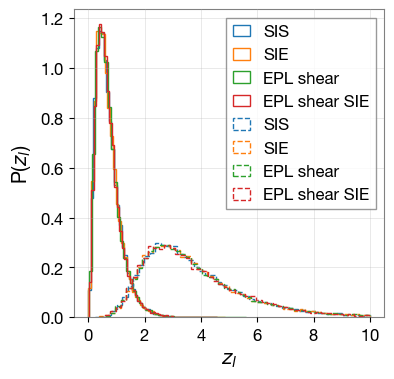

In [37]:
zl1 = lens_params_all1["zl"]
zs1 = lens_params_all1["zs"]
zl2 = lens_params_all2["zl"]
zs2 = lens_params_all2["zs"]
zl3 = lens_params_all3["zl"]
zs3 = lens_params_all3["zs"]
zl4 = lens_params_all4["zl"]
zs4 = lens_params_all4["zs"]

fig = plt.figure(figsize=(4,4))
plt.hist(zl1, bins=50, histtype="step", label="SIS", density=True, color="C0")
plt.hist(zl2, bins=50, histtype="step", label="SIE", density=True, color="C1")
plt.hist(zl3, bins=50, histtype="step", label="EPL shear", density=True, color="C2")
plt.hist(zl4, bins=50, histtype="step", label="EPL shear SIE", density=True, color="C3")

plt.hist(zs1, bins=50, histtype="step", label="SIS", density=True, color="C0", linestyle="--")
plt.hist(zs2, bins=50, histtype="step", label="SIE", density=True, color="C1", linestyle="--")
plt.hist(zs3, bins=50, histtype="step", label="EPL shear", density=True, color="C2", linestyle="--")
plt.hist(zs4, bins=50, histtype="step", label="EPL shear SIE", density=True, color="C3", linestyle="--")

plt.legend()
plt.xlabel(r"$z_l$")
plt.ylabel(r"P($z_l$)")
plt.grid(alpha=0.4)
plt.show()


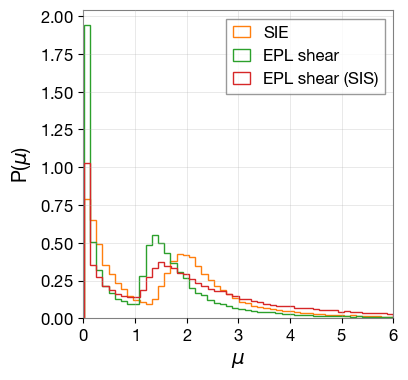

In [39]:
mu_max = 6
# mu1 = lens_params_all1["magnifications"].flatten()
# mu1 = abs(mu1[~np.isnan(mu1)])
# mu1 = mu1[mu1 < mu_max]
mu2 = lens_params_all2["magnifications"].flatten()
mu2 = abs(mu2[~np.isnan(mu2)])
mu2 = mu2[mu2 < mu_max]
mu3 = lens_params_all3["magnifications"].flatten()
mu3 = abs(mu3[~np.isnan(mu3)])
mu3 = mu3[mu3 < mu_max]
mu4 = lens_params_all4["magnifications"].flatten()
mu4 = abs(mu4[~np.isnan(mu4)])
mu4 = mu4[mu4 < mu_max]

fig = plt.figure(figsize=(4,4))
plt.hist(mu2, bins=50, histtype="step", label="SIE", density=True, color="C1")
plt.hist(mu3, bins=50, histtype="step", label="EPL shear", density=True, color="C2")
plt.hist(mu4, bins=50, histtype="step", label="EPL shear (SIS)", density=True, color="C3")

plt.legend()
plt.xlabel(r"$\mu$")
plt.ylabel(r"P($\mu$)")
plt.grid(alpha=0.4)
plt.xlim(0, mu_max)
plt.show()

* only Magnification is different, and it can be important for the lensing rate.

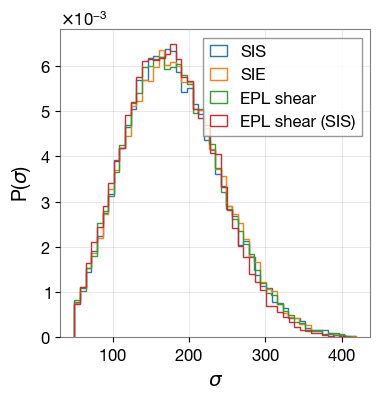

In [40]:
# velocity dispersion
sigma1 = lens_params_all1["sigma"].flatten()
sigma1 = sigma1[~np.isnan(sigma1)]
sigma2 = lens_params_all2["sigma"].flatten()
sigma2 = sigma2[~np.isnan(sigma2)]
sigma3 = lens_params_all3["sigma"].flatten()
sigma3 = sigma3[~np.isnan(sigma3)]
sigma4 = lens_params_all4["sigma"].flatten()
sigma4 = sigma4[~np.isnan(sigma4)]

fig = plt.figure(figsize=(4,4))
plt.hist(sigma1, bins=50, histtype="step", label="SIS", density=True, color="C0")
plt.hist(sigma2, bins=50, histtype="step", label="SIE", density=True, color="C1")
plt.hist(sigma3, bins=50, histtype="step", label="EPL shear", density=True, color="C2")
plt.hist(sigma4, bins=50, histtype="step", label="EPL shear (SIS)", density=True, color="C3")

plt.legend()
plt.xlabel(r"$\sigma$")
plt.ylabel(r"P($\sigma$)")
plt.grid(alpha=0.4)
plt.show()

* cross-section independent velocity dispersion

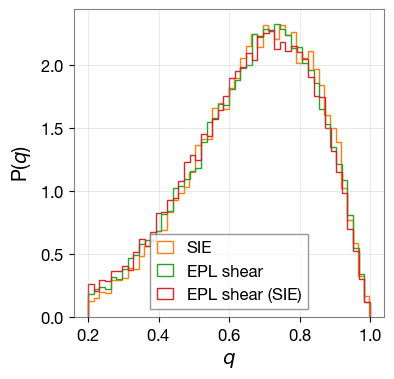

In [41]:
# axis ratio
q2 = lens_params_all2["q"].flatten()
q2 = q2[~np.isnan(q2)]
q3 = lens_params_all3["q"].flatten()
q3 = q3[~np.isnan(q3)]
q4 = lens_params_all4["q"].flatten()
q4 = q4[~np.isnan(q4)]

fig = plt.figure(figsize=(4,4))
plt.hist(q2, bins=50, histtype="step", label="SIE", density=True, color="C1")
plt.hist(q3, bins=50, histtype="step", label="EPL shear", density=True, color="C2")
plt.hist(q4, bins=50, histtype="step", label="EPL shear (SIE)", density=True, color="C3")
plt.legend()
plt.xlabel(r"$q$")
plt.ylabel(r"P($q$)")
plt.grid(alpha=0.4)
plt.show()

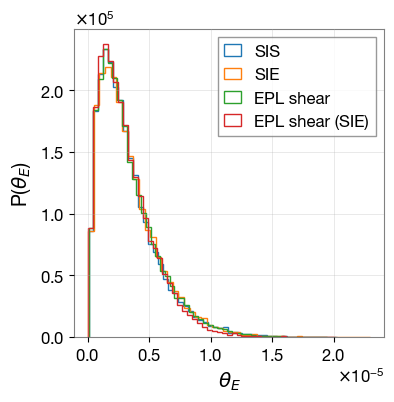

In [42]:
# eins radius
theta_e1 = lens_params_all1["theta_E"].flatten()
theta_e1 = theta_e1[~np.isnan(theta_e1)]
theta_e2 = lens_params_all2["theta_E"].flatten()
theta_e2 = theta_e2[~np.isnan(theta_e2)]
theta_e3 = lens_params_all3["theta_E"].flatten()
theta_e3 = theta_e3[~np.isnan(theta_e3)]
theta_e4 = lens_params_all4["theta_E"].flatten()
theta_e4 = theta_e4[~np.isnan(theta_e4)]

fig = plt.figure(figsize=(4,4))
plt.hist(theta_e1, bins=50, histtype="step", label="SIS", density=True, color="C0")
plt.hist(theta_e2, bins=50, histtype="step", label="SIE", density=True, color="C1")
plt.hist(theta_e3, bins=50, histtype="step", label="EPL shear", density=True, color="C2")
plt.hist(theta_e4, bins=50, histtype="step", label="EPL shear (SIE)", density=True, color="C3")
plt.legend()
plt.xlabel(r"$\theta_E$")
plt.ylabel(r"P($\theta_E$)")
plt.grid(alpha=0.4)
plt.show()